# Домашнее задание по кластеризации


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (7, 6)

## Данные

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('geo.xlsx')

In [18]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


### Задание 1. Визуально разделить город на районы безотносительно голосов.

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [61]:
# Оставим только координаты
X = data[['x','y']]

In [62]:
# Обучим модель с разбиением на 10 кластеров, метод KMeans.
model = KMeans(n_clusters=10)
clusters = model.fit_predict(X)

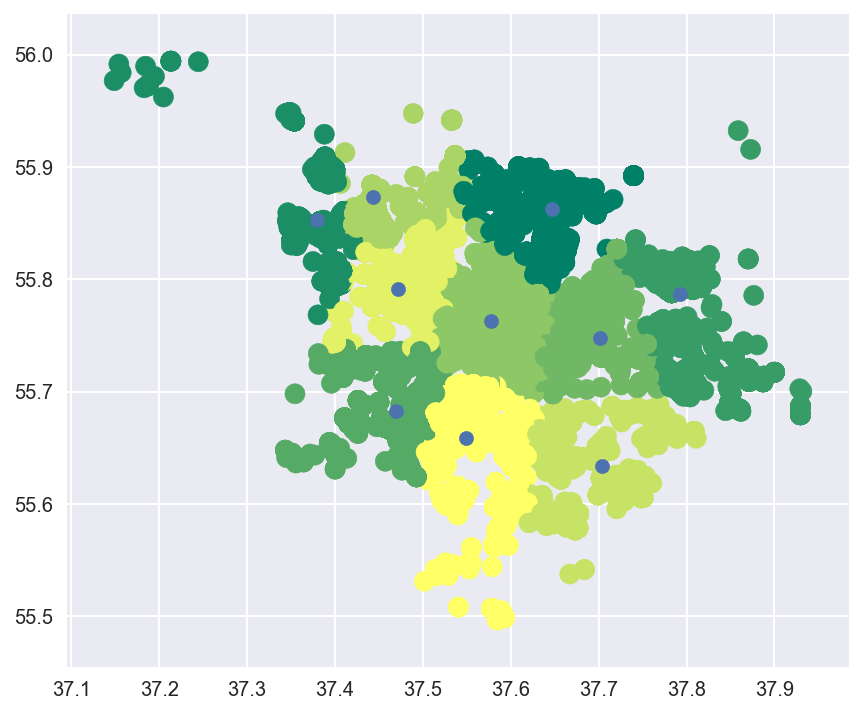

In [63]:
plt.scatter(X.x, X.y, c=clusters, cmap='summer', s=100)
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

### Задание 2. Сделать кластеризацию с учетом голосов

In [53]:
#Разделим данные по результатам голосований
X_yes = data[data['comment_class']==1]
X_no = data[data['comment_class']==-1]

In [64]:
# Обучим модель с разбиением на 10 кластеров, метод KMeans.
clusters_yes = model.fit_predict(X_yes)
clusters_no = model.fit_predict(X_no)

##### Построим отдельно графики распределений голосующих

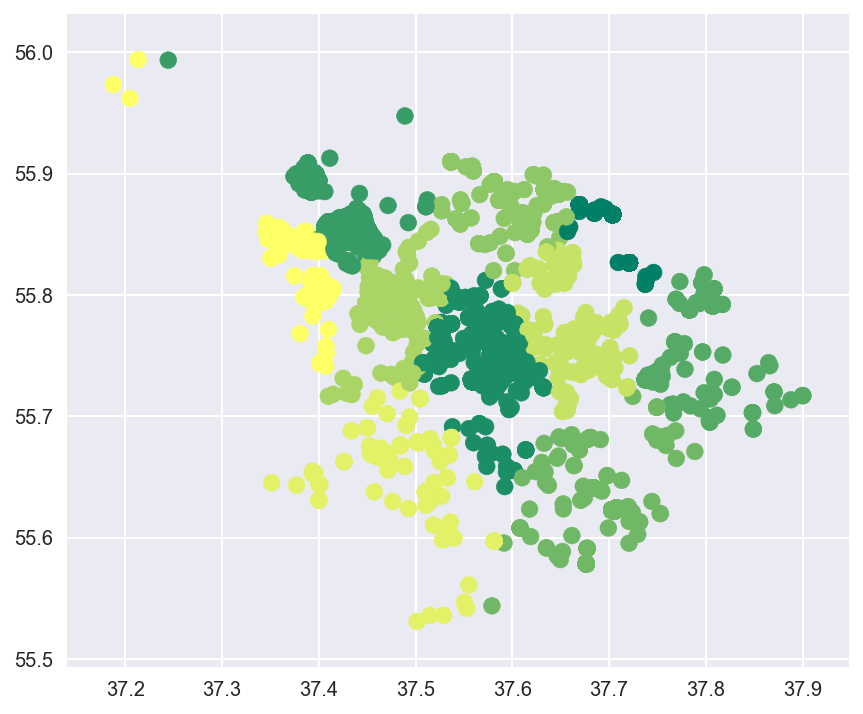

In [68]:
plt.scatter(X_yes.x, X_yes.y, c=clusters_yes, cmap='summer', s=70)

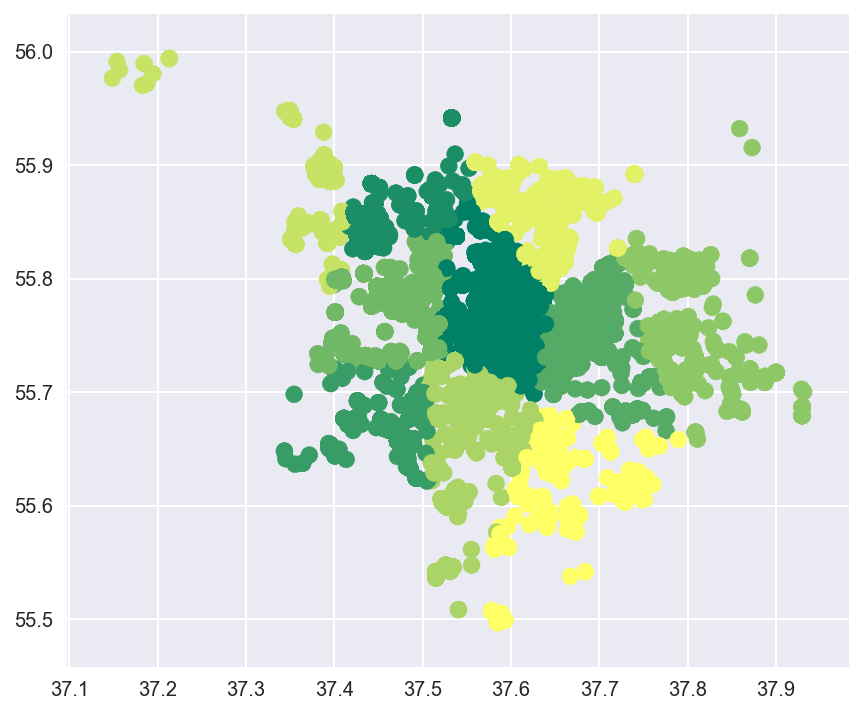

In [69]:
plt.scatter(X_no.x, X_no.y, c=clusters_no, cmap='summer', s=70)

### Задание 3. Подбор количества кластеров для KMeans (подберем для голосовавших против)

In [70]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_no)
    k_inertia.append(clf_kmeans.inertia_)

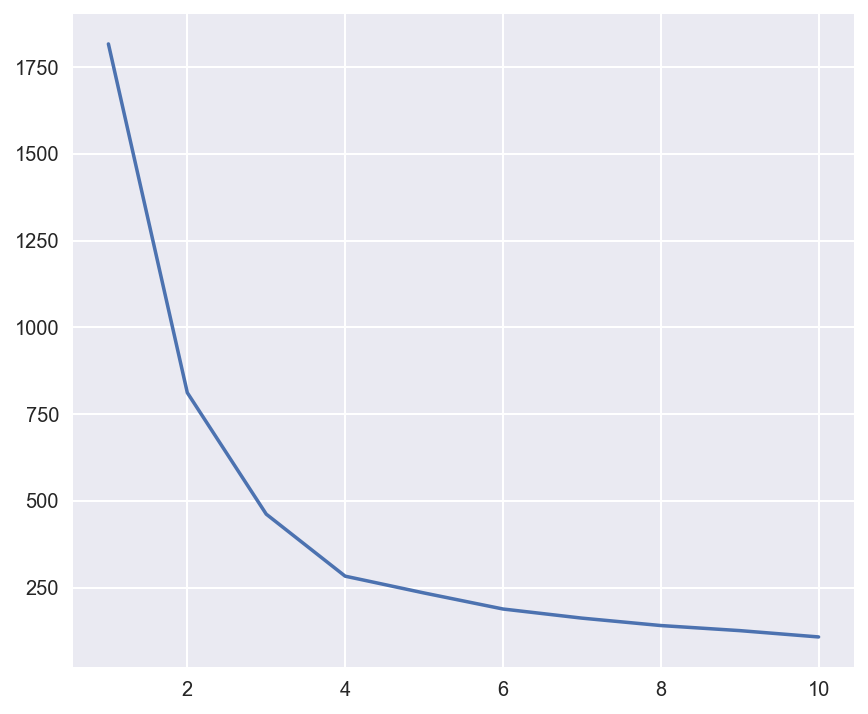

In [71]:
plt.plot(ks, k_inertia)

In [72]:
diff = np.diff(k_inertia)

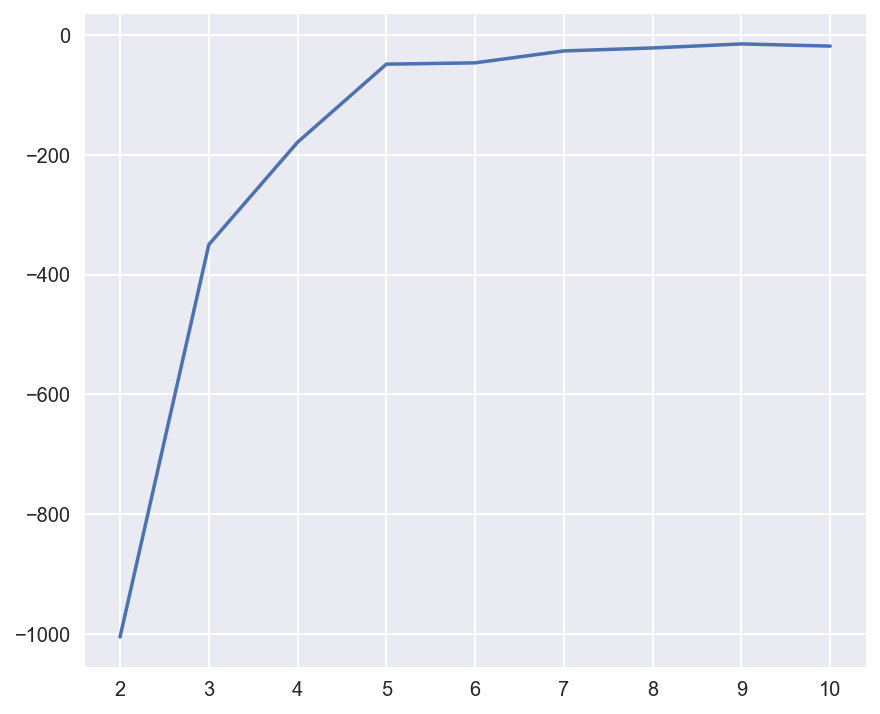

In [73]:
plt.plot(ks[1:], diff)

In [74]:
diff_r = diff[1:] / diff[:-1]

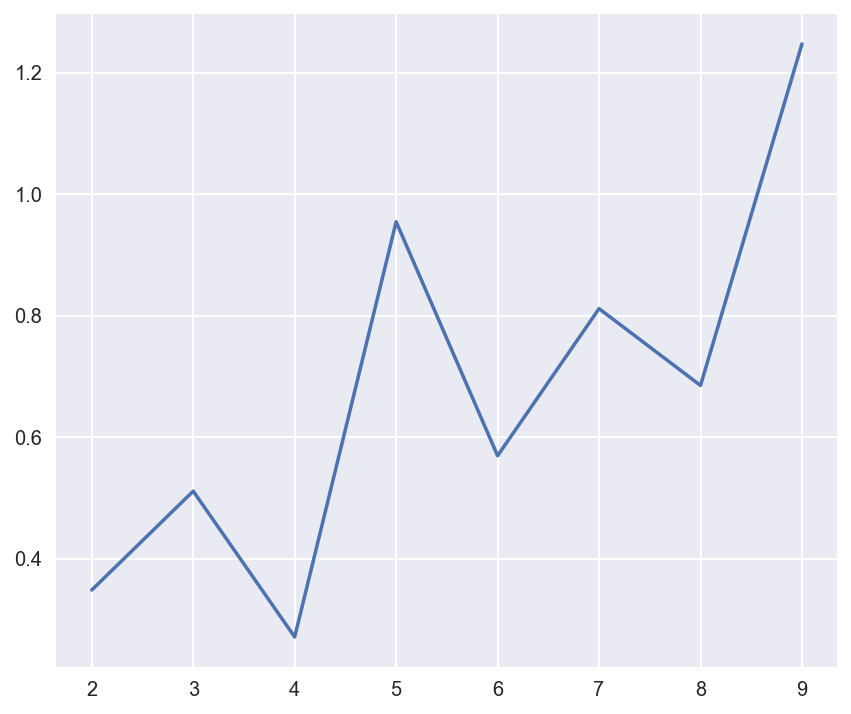

In [75]:
plt.plot(ks[1:-1], diff_r)

In [76]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

4

#### Построим график такой кластеризации

In [83]:
model = KMeans(n_clusters=k_opt)
clusters_no = model.fit_predict(X_no)

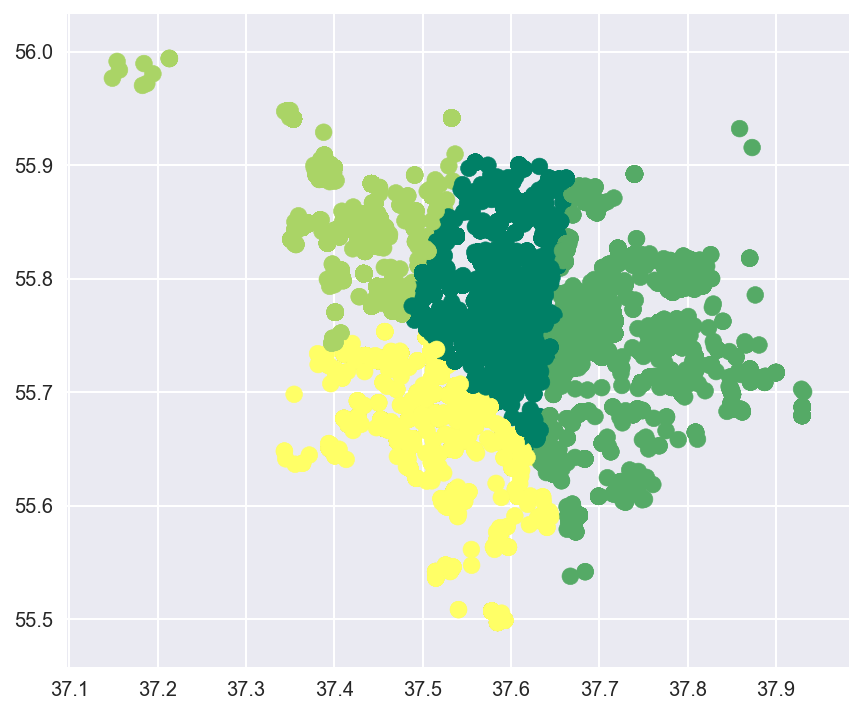

In [84]:
plt.scatter(X_no.x, X_no.y, c=clusters_no, cmap='summer', s=70)